#데이터 불러오기

In [13]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/diabetes.csv")

df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


#마지막 열인 outcome은 필요없으니 삭제

In [14]:
df = df.drop(columns=['Outcome'])
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


#X와 Y를 나누기

In [15]:
target = 'BMI'
X = df.drop(columns=[target])
y = df[target]
y

,BMI
0,33.6
1,26.6
2,23.3
3,28.1
4,43.1
...,...
763,32.9
764,36.8
765,26.2
766,30.1


#X를 스케일링 업하기

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

#Y를 라벨인코딩 하기

In [17]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder 객체 생성
encoder = LabelEncoder()

# Y 데이터를 인코딩하여 Y_encoded 변수에 저장
y_encoded = encoder.fit_transform(y)

# 변환된 라벨을 Y에 할당하여 업데이트
Y = y_encoded

# 업데이트된 Y의 상위 5개 값 확인
print("업데이트된 Y 데이터의 상위 5개:\n", Y[:5])

# 업데이트된 Y의 고유한 값과 개수 확인
print("\n업데이트된 Y의 고유한 값들:", pd.Series(Y).unique())
print("\n업데이트된 Y의 값별 개수:\n", pd.Series(Y).value_counts().sort_index())

업데이트된 Y 데이터의 상위 5개:
 [123  62  30  77 209]

업데이트된 Y의 고유한 값들: [123  62  30  77 209  53 103 140  99   0 163 167  67  95  54  94 227  90
 211 133 180 141 185  86 153 104 181  29  20 128 147 107  45   8  72  37
 120 118 169 158 127 189  25 223  70 200  91  76 178   5  39  41 124 134
  27 164 233 190 198  47  51 117 114 206   7  85  82 212 138 109  44 115
 210  22  88  43 236 113 172  61   3 232  35 126  11  83 239 177  57  23
 183  89 130 161 121 105  78 243 129  64 244 208 132  75 170  14 125 101
 156 182  69  18 191 234 240  49 194 159 217  93 108  80 213 116 247 220
 136  73 146  24 119  98 241  40  26 135 102 188  36 162 142 207 205 199
 145 165  84  33 144 154 221 215 229 137 214 216   2  87  55 110 150 187
  48  71 225  74  46  50 166  66  56 174  12 148 100 112 242  13 184  52
  58   4 168  32 224  28 186 155  17 195 202 131  68 152  92 179 171 149
 235   9  21 226  34  19 201 204   1  60 222 157  42 111 246  15  63  96
 228 197 175 139 203 192 231 122 160  97  59  16 151  81  65 17

#one-hot encoding하기

In [18]:
Y = pd.get_dummies(y_encoded).values

Y

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

#훈련과 테스트 데이터 나누기

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#모델 훈련

In [20]:
from tensorflow.keras import layers, models
model = models.Sequential([
    layers.Dense(64, activation="relu", input_shape=(X.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(32, activation="relu"),
    layers.Dense(Y.shape[1], activation="softmax")   # 클래스 수 맞춤
])

model.compile(
    optimizer="adam",
    loss="mse",
    metrics=["mse"]
)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    verbose=1
)

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 1088.9545 - mse: 1088.9545 - val_loss: 1101.4489 - val_mse: 1101.4489
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1047.2561 - mse: 1047.2561 - val_loss: 1101.4489 - val_mse: 1101.4489
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1084.4562 - mse: 1084.4562 - val_loss: 1101.4489 - val_mse: 1101.4489
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1050.6378 - mse: 1050.6378 - val_loss: 1101.4489 - val_mse: 1101.4489
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1037.9027 - mse: 1037.9027 - val_loss: 1101.4490 - val_mse: 1101.4490
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1078.9006 - mse: 1078.9006 - val_loss: 1101.4489 - val_mse: 1101.4489
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1086.7355 - mse: 1086.7355 - val_loss: 1101.4489 - val_mse: 1101.4489
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1100.9966 - mse: 1100.9966 - val_loss: 1101.4489 - val_m

#결과값

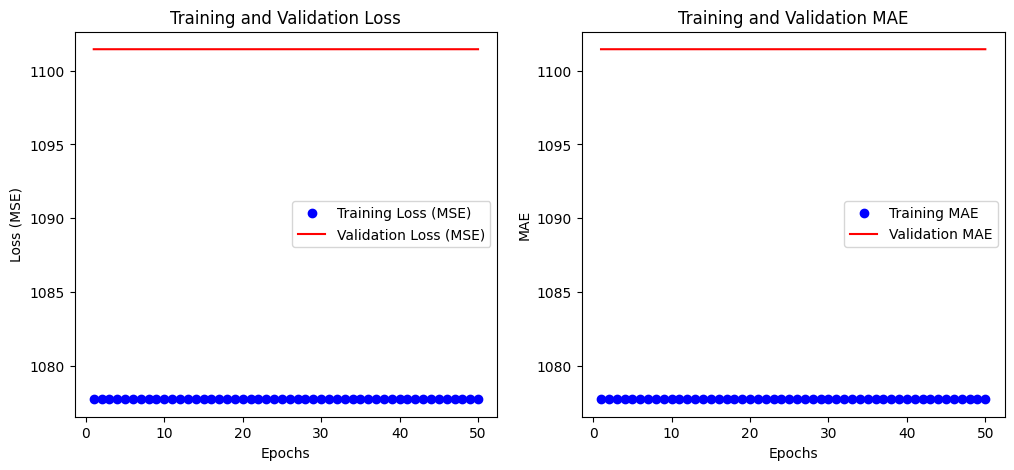

In [22]:
import matplotlib.pyplot as plt

# --------------------------------------------------
# model.fit() 코드는 이미 실행되었다고 가정합니다.
# history = model.fit(...)
# --------------------------------------------------

def plot_history(history):
    # 훈련 손실 (loss)
    loss = history.history['loss']
    # 검증 손실 (validation loss)
    val_loss = history.history['val_loss']

    # 평가지표 (mae)
    metric = history.history['mse']
    # 검증 평가지표 (validation mae)
    val_metric = history.history['val_mse']

    epochs = range(1, len(loss) + 1)

    # --------------------------------------------------
    # 1. 손실 (Loss) 그래프
    # --------------------------------------------------
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'bo', label='Training Loss (MSE)')
    plt.plot(epochs, val_loss, 'r', label='Validation Loss (MSE)')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss (MSE)')
    plt.legend()

    # --------------------------------------------------
    # 2. 평가지표 (Metric, MAE) 그래프
    # --------------------------------------------------
    plt.subplot(1, 2, 2)
    plt.plot(epochs, metric, 'bo', label='Training MAE')
    plt.plot(epochs, val_metric, 'r', label='Validation MAE')
    plt.title('Training and Validation MAE')
    plt.xlabel('Epochs')
    plt.ylabel('MAE')
    plt.legend()

    plt.show()

# history 객체를 인수로 전달하여 그래프를 그립니다.
plot_history(history)